# 1. 전처리 & 명사 단어 추출

In [299]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = './data/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [82]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
import re
kiwi = Kiwi()
stopwords_dict = Stopwords()

In [98]:
def Kr_preprocessing(text):
    text = text.strip()
    text = re.sub(r'[^\d\s\w]','',text)
    kiwi_tokens = kiwi.tokenize(text, stopwords=stopwords_dict)
    noun_words=[]
    for token in kiwi_tokens:
        if 'NN' in token.tag and len(token.form)>1:
            noun_words.append(token.form)
    return ' '.join(noun_words)

In [94]:
filtered_docs = [Kr_preprocessing(doc) for doc in total_docs]

In [95]:
print(filtered_docs)

['국내 연구진 신종 코로나바이러스 감염증 코로나 예방 백신 접종 변종 바이러스 원리 성훈 서울대 전기 정보 공학부 교수 연구진 서울대병원 오명 박완 감염내과 교수 정준 생화학 교실 교수 파스퇴르 연구소 코로나 백신 반복 투여 면역력 원리 설명 기술 개발 처음 개발 코로나 예방 백신 접종 미크론 변종 대응 변종 야생 코로나바이러스 유전 정보 백신 미크론 변종 바이러스 대항 항체 연구진 코로나 예방 백신 차례 접종 의료진 혈액 채취 차세대 염기 서열 분석 결합 면역 영상 기술 면역 세포 이상 유전자 정보 분석 면역 영상 기술 기존 엑스선 영상 질병 진단 개인 면역 상태 영상 종합 분석 차세대 기술 시간 면역 세포 분포 기능 분화 형태 상호 작용 포괄 정보 질병 특이 면역 반응 이해 특정 치료법 환자 개인 반응 예측 연구진 유전자 데이터 기반 백신 접종 면역 체계 변화 연속 추적 결과 번째 접종 항체 체세포 돌연변이 축적 항체 다양 항원 결합 체세포 돌연변이 면역계 외부 요인 적응 반응 항원 인식 B세포 다양 백신 반복 접종 등장 변종 바이러스 효과 대응 이유 변종 바이러스 대응 항체 최초 형성 시기 접종 이전 항체 접종 체세포 돌연변이 축적 처음 코로나바이러스 미크론 포함 변종 바이러스 중화 진화 연구진 코로나 돌연변이 대응 체내 면역 원리 세계 최초 해석 결과 논문 저자 최재원 서울대 전기 공학부 연구원 기존 코로나 백신 반복 접종 미크론 대항 항체 현상 면역학 교과서 설명 서울대병원 개개인 면역 세포 분화 추적 현상 설명 성훈 교수 이번 연구 개발 차세대 염기 서열 분석 결합 면역 영상 기술 팬데믹 대비 정확 신속 백신 면역 반응 이해 다양 질병 치료법 예방책 개발 중요 역할 연구 결과 국제 학술지 네이처 커뮤니케이션 게재', '국내 연구진 신종 코로나바이러스 감염증 코로나 백신 접종 미크론 변종 면역 반응 발달 원리 규명 향후 코로나 유행 상황 예방 백신 접종 전략 마련 도움 기대 서울대병원 박완 감염내과 교수 연구 백신 접종 체세포 돌연변이 증가 유도 코

In [57]:
len(filtered_docs[1])

713

# 2. 문서의 벡터화 (TF-IDF 정보 사용)

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [153]:
filtered_docs

['국내 연구진 신종 코로나바이러스 감염증 코로나 예방 백신 접종 변종 바이러스 원리 성훈 서울대 전기 정보 공학부 교수 연구진 서울대병원 오명 박완 감염내과 교수 정준 생화학 교실 교수 파스퇴르 연구소 코로나 백신 반복 투여 면역력 원리 설명 기술 개발 처음 개발 코로나 예방 백신 접종 미크론 변종 대응 변종 야생 코로나바이러스 유전 정보 백신 미크론 변종 바이러스 대항 항체 연구진 코로나 예방 백신 차례 접종 의료진 혈액 채취 차세대 염기 서열 분석 결합 면역 영상 기술 면역 세포 이상 유전자 정보 분석 면역 영상 기술 기존 엑스선 영상 질병 진단 개인 면역 상태 영상 종합 분석 차세대 기술 시간 면역 세포 분포 기능 분화 형태 상호 작용 포괄 정보 질병 특이 면역 반응 이해 특정 치료법 환자 개인 반응 예측 연구진 유전자 데이터 기반 백신 접종 면역 체계 변화 연속 추적 결과 번째 접종 항체 체세포 돌연변이 축적 항체 다양 항원 결합 체세포 돌연변이 면역계 외부 요인 적응 반응 항원 인식 B세포 다양 백신 반복 접종 등장 변종 바이러스 효과 대응 이유 변종 바이러스 대응 항체 최초 형성 시기 접종 이전 항체 접종 체세포 돌연변이 축적 처음 코로나바이러스 미크론 포함 변종 바이러스 중화 진화 연구진 코로나 돌연변이 대응 체내 면역 원리 세계 최초 해석 결과 논문 저자 최재원 서울대 전기 공학부 연구원 기존 코로나 백신 반복 접종 미크론 대항 항체 현상 면역학 교과서 설명 서울대병원 개개인 면역 세포 분화 추적 현상 설명 성훈 교수 이번 연구 개발 차세대 염기 서열 분석 결합 면역 영상 기술 팬데믹 대비 정확 신속 백신 면역 반응 이해 다양 질병 치료법 예방책 개발 중요 역할 연구 결과 국제 학술지 네이처 커뮤니케이션 게재',
 '국내 연구진 신종 코로나바이러스 감염증 코로나 백신 접종 미크론 변종 면역 반응 발달 원리 규명 향후 코로나 유행 상황 예방 백신 접종 전략 마련 도움 기대 서울대병원 박완 감염내과 교수 연구 백신 접종 체세포 돌연변이 증가 유도 

In [166]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
DTM_tfidf = tfidf_vectorizer.fit_transform(filtered_docs)
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [270]:
print(DTM_TFIDF)

[[0.         0.         0.03640438 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.07046972 ... 0.         0.         0.        ]
 ...
 [0.         0.03468573 0.         ... 0.         0.         0.04022172]
 [0.04170523 0.04170523 0.         ... 0.         0.         0.        ]
 [0.08851724 0.         0.         ... 0.         0.         0.        ]]


In [170]:
DTM_TFIDF.shape

(13, 822)

# 3. KMeans를 알고리즘을 이용한 군집화

In [277]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 3.1. PCA를 이용한 차원 축소

In [280]:
pca = PCA(n_components=10)
pca_DTM_TFIDF = pca.fit_transform(DTM_TFIDF)
pca_DTM_TFIDF.shape

(13, 10)

## 3.2. 실루엣 스코어 확인 및 군집화

In [283]:
from sklearn.metrics import silhouette_score

for i in range(2, 10) :
    kmeans = KMeans(n_clusters=i)
    clusters_pca_TFIDF = kmeans.fit_predict(pca_DTM_TFIDF)
    print("n_clusters:", i, "|", "silhouette_score:", silhouette_score(pca_DTM_TFIDF, clusters_pca_TFIDF))

n_clusters: 2 | silhouette_score: 0.24796161246594967
n_clusters: 3 | silhouette_score: 0.3927266037237627
n_clusters: 4 | silhouette_score: 0.519252380588251
n_clusters: 5 | silhouette_score: 0.507362969821009
n_clusters: 6 | silhouette_score: 0.42882922281234076
n_clusters: 7 | silhouette_score: 0.4019078656768383
n_clusters: 8 | silhouette_score: 0.3705119604476422
n_clusters: 9 | silhouette_score: 0.33593418555486415


In [284]:
kmeans = KMeans(n_clusters=4)
clusters_pca_TFIDF = kmeans.fit_predict(pca_DTM_TFIDF)
clusters_pca_TFIDF

array([0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2])

# 4. 군집화 결과 시각화

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
pca = PCA(n_components=2)
pca2_DTM_TFIDF = pca.fit_transform(DTM_TFIDF)
clusters_pca2_TFIDF = kmeans.fit_predict(pca2_DTM_TFIDF)

In [288]:
data1 = pd.DataFrame(pca2_DTM_TFIDF, columns=['x1', 'x2'])
data1['cluster_id']=clusters_pca2_TFIDF.tolist()

In [289]:
data1

,x1,x2,cluster_id
0,-0.101487,0.068166,3
1,-0.097285,0.061365,3
2,-0.112735,0.055151,3
3,0.692739,-0.145755,0
4,0.663787,-0.145157,0
5,0.633567,-0.137976,0
6,0.576361,-0.135917,0
7,-0.524302,-0.600631,2
8,-0.481280,-0.537026,2
9,-0.528502,-0.601823,2


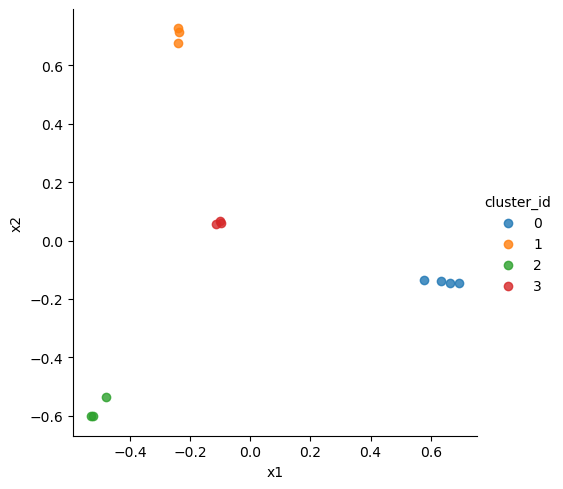

In [290]:
sns.lmplot(x='x1', y='x2', data=data1, hue='cluster_id',fit_reg=False )
plt.show()